In [4]:
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.python.keras.applications import VGG19
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    '../Data/classification_data/train-mix2',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
validation = tf.keras.preprocessing.image_dataset_from_directory(
    '../Data/classification_data/train-mix2',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 23799 files belonging to 4 classes.
Using 19040 files for training.
Found 23799 files belonging to 4 classes.
Using 4759 files for validation.


In [6]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(4, activation= 'softmax')
])

In [7]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
## fit model
history=model.fit(train_data,validation_data= validation,batch_size=32,epochs = 20,callbacks=[early])

Epoch 1/20
595/595 [==============================] - 862s 1s/step - loss: 0.8695 - accuracy: 0.6816 - val_loss: 0.5840 - val_accuracy: 0.7701
Epoch 2/20
595/595 [==============================] - 952s 2s/step - loss: 0.5310 - accuracy: 0.8013 - val_loss: 0.4018 - val_accuracy: 0.8521
Epoch 3/20
595/595 [==============================] - 1158s 2s/step - loss: 0.4092 - accuracy: 0.8467 - val_loss: 0.3752 - val_accuracy: 0.8569
Epoch 4/20
595/595 [==============================] - 1199s 2s/step - loss: 0.3235 - accuracy: 0.8793 - val_loss: 0.3509 - val_accuracy: 0.8668
Epoch 5/20
595/595 [==============================] - 1138s 2s/step - loss: 0.2691 - accuracy: 0.8976 - val_loss: 0.3548 - val_accuracy: 0.8741
Epoch 6/20
595/595 [==============================] - 1100s 2s/step - loss: 0.2261 - accuracy: 0.9149 - val_loss: 0.3560 - val_accuracy: 0.8781
Epoch 7/20
595/595 [==============================] - 1114s 2s/step - loss: 0.1903 - accuracy: 0.9277 - val_loss: 0.3841 - val_accuracy: 0

In [10]:
model.save('models/blended_covid_data')

INFO:tensorflow:Assets written to: models/blended_covid_data/assets


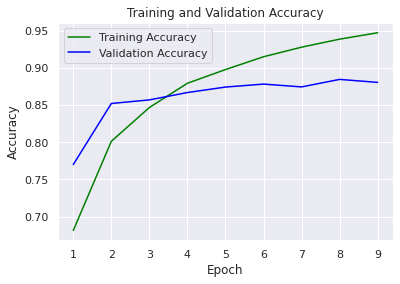

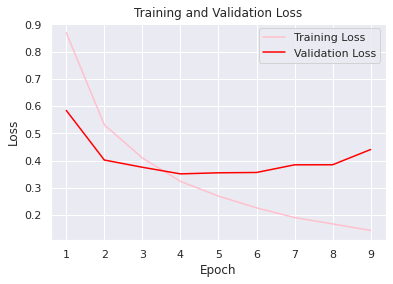

In [11]:
#plotting training values
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

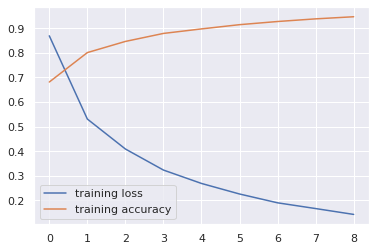

In [12]:
#training accuracy and loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

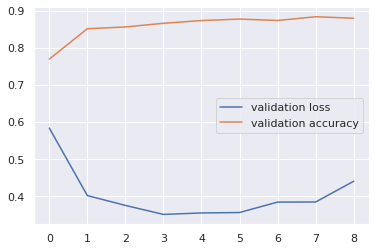

In [13]:
#validation accuracy and loss
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [14]:
import os
import glob

class_names =  ["COVID-19","Lung","NORMAL","Viral Pneumonia"]
label_names= ["COVID", "Normal", "Viral", "Lung"]


[0]
COVID-19


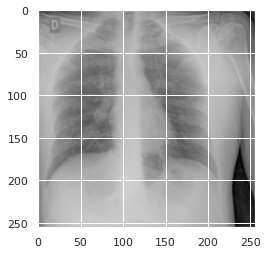

In [15]:
#example 1
image_path = glob.glob(os.path.join("../Data/classification_data/test/COVID", "*.png"))[0]
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[2]
NORMAL


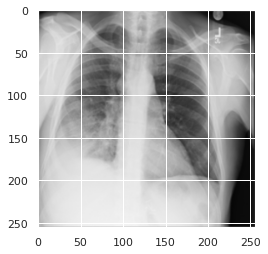

In [16]:
#example 2
image_path = glob.glob(os.path.join("../Data/classification_data/test/Lung", "*.png"))[0]
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[2]
NORMAL


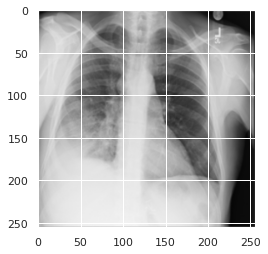

In [17]:
#example 3
glob.glob(os.path.join("../Data/classification_data/test/Normal", "*.png"))[0]
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[2]
NORMAL


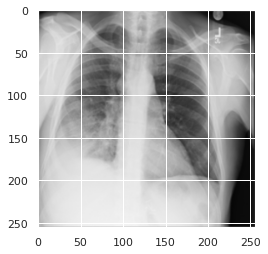

In [18]:
#example 4
glob.glob(os.path.join("../Data/classification_data/test/Viral", "*.png"))[0]
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [19]:
pred_list = np.zeros((250,4))

In [20]:
#model = keras.models.load_model('models/blended_data')
label_names= ["COVID", "Lung", "Normal", "Viral"]

In [21]:
for idx, label in enumerate(label_names):
    path_list = sorted(glob.glob(os.path.join("../Data/classification_data/test", label, "*.png")))
    print("testing %d %s CXR images" %(len(path_list), label))

    for i in range(len(path_list)):
        image_path = path_list[i]
        new_img = image.load_img(image_path, target_size=(256, 256))
        img = image.img_to_array(new_img)
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        prediction = np.argmax(prediction,axis=1)
        pred_list[i,idx] = prediction

testing 250 COVID CXR images
testing 250 Lung CXR images
testing 250 Normal CXR images
testing 250 Viral CXR images


In [22]:
pred_list

array([[0., 1., 2., 2.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 1.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 3., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [2., 1., 1., 3.],
       [0., 2., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 2., 2., 3.],
       [1., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 0., 2., 3.],
       [0., 1., 2., 3.],
       [1., 1., 2., 3.],
       [0., 1., 2., 3.],
       [2., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 1., 1., 3.],
       [0., 1., 2., 3.],


In [23]:
df = pd.DataFrame(pred_list)

In [24]:
df.columns = class_names

In [25]:
df.to_csv("classification_blended_covid7k.csv")

In [26]:
label = np.zeros((250,4))

In [27]:
label[:,0] = 0
label[:,1] = 1
label[:,2] = 2
label[:,3] = 3

In [28]:
label = pd.DataFrame(label)
label.columns = class_names

In [29]:
#label

In [30]:
(df == label).sum(axis = 0)/250

COVID-19           0.904
Lung               0.824
NORMAL             0.892
Viral Pneumonia    0.952
dtype: float64